In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

first we have to import pandas to manipulate dataset

In [34]:
import pandas as dp 
print(dp.__version__)

2.2.3


loading dataset

In [35]:
df=dp.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [36]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [37]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


after loading data we can start by the second step which is cleaning data
2-data cleaning starting by checking the null values

In [38]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

no null values which is greate 

checking for duplicates in the dataset

In [39]:
print("Number of duplicate rows:", df.duplicated().sum())
# Remove duplicates if an

Number of duplicate rows: 0


checking datatypes of data 

In [40]:
print(df.dtypes)

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


a cell to know all the categorical features

In [41]:
# Select categorical columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns
print("Categorical features:")
print(categorical_features.tolist())

Categorical features:
[' education', ' self_employed', ' loan_status']


now we have to encode those three categorical features 

In [46]:
df.columns = df.columns.str.strip()


In [47]:
print(df['education'].unique())
print(df['self_employed'].unique())
print(df['loan_status'].unique())


[' Graduate' ' Not Graduate']
[' No' ' Yes']
[' Approved' ' Rejected']


we do encode using the manual ecoding 

mapping

In [48]:
# Define mappings
mappings = {
    'education':     {'graduate': 1, 'not graduate': 0},
    'self_employed': {'yes': 1, 'no': 0},
    'loan_status':   {'approved': 1, 'rejected': 0}
}

In [49]:
# Normalize and encode each feature
for col, mp in mappings.items():
    df[col] = df[col].astype(str).str.strip().str.lower().map(mp)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int64
 3   self_employed             4269 non-null   int64
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


In [54]:
df[features].head()

,education,self_employed,loan_status
0,1,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


checking the scale

In [55]:
# Check the min, max, mean, std of each feature
print(df.describe())

           loan_id  no_of_dependents    education  self_employed  \
count  4269.000000       4269.000000  4269.000000    4269.000000   
mean   2135.000000          2.498712     0.502225       0.503631   
std    1232.498479          1.695910     0.500054       0.500045   
min       1.000000          0.000000     0.000000       0.000000   
25%    1068.000000          1.000000     0.000000       0.000000   
50%    2135.000000          3.000000     1.000000       1.000000   
75%    3202.000000          4.000000     1.000000       1.000000   
max    4269.000000          5.000000     1.000000       1.000000   

       income_annum   loan_amount    loan_term  cibil_score  \
count  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean   5.059124e+06  1.513345e+07    10.900445   599.936051   
std    2.806840e+06  9.043363e+06     5.709187   172.430401   
min    2.000000e+05  3.000000e+05     2.000000   300.000000   
25%    2.700000e+06  7.700000e+06     6.000000   453.000000   
50%    5.

lets do scaling to the featurs

In [56]:
# Cell 1 — import StandardScaler
from sklearn.preprocessing import StandardScaler

In [57]:
# Cell 2 — define which columns to scale (continuous features only)
scale_cols = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

In [58]:
# Cell 3 — create a scaler and fit_transform the selected columns
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [59]:
# Cell 4 — quick check: scaled columns should now have mean ≈ 0 and std ≈ 1
df[scale_cols].describe().round(2)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.47,-1.73,-1.64,-1.56,-1.74,-1.16,-1.13,-1.63,-1.53
25%,-0.88,-0.84,-0.82,-0.86,-0.85,-0.81,-0.84,-0.84,-0.82
50%,0.30,0.01,-0.07,-0.16,0.00,-0.29,-0.29,-0.06,-0.12
75%,0.89,0.87,0.70,0.89,0.86,0.59,0.60,0.72,0.65
max,1.48,1.72,2.69,1.59,1.74,3.33,3.29,2.64,2.99


split the data 

In [66]:
# Cell 1 — prepare dataframe & target
df = df.copy()
df = df.dropna(subset=['loan_status'])          # drop rows with missing target
df['loan_status'] = df['loan_status'].astype(int)


In [67]:
# Cell 2 — prepare features (X) and target (y)
drop_cols = ['loan_status', 'loan_id']
X = df.drop(columns=[c for c in drop_cols if c in df.columns])
y = df['loan_status']

splitting data to 80 / 20 

In [68]:
# Cell 3 — first split: hold out TEST (20% overall), keep a temp training set
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

In [69]:
# Cell 4 — second split: split X_temp into TRAIN (60%) and VAL (20%) -> use 25% of X_temp as val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

displaying the shape

In [70]:
# Cell 5 — sanity checks: shapes and class distributions
print("Shapes: X_train, X_val, X_test ->", X_train.shape, X_val.shape, X_test.shape)
for name, arr in [('Train', y_train), ('Val', y_val), ('Test', y_test)]:
    print(f"\n{name} counts:\n{arr.value_counts()}\n{name} percent:\n{arr.value_counts(normalize=True).round(3)}")

Shapes: X_train, X_val, X_test -> (2561, 11) (854, 11) (854, 11)

Train counts:
loan_status
1    1594
0     967
Name: count, dtype: int64
Train percent:
loan_status
1    0.622
0    0.378
Name: proportion, dtype: float64

Val counts:
loan_status
1    531
0    323
Name: count, dtype: int64
Val percent:
loan_status
1    0.622
0    0.378
Name: proportion, dtype: float64

Test counts:
loan_status
1    531
0    323
Name: count, dtype: int64
Test percent:
loan_status
1    0.622
0    0.378
Name: proportion, dtype: float64


great lets train the model 

In [71]:
#import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [72]:
# Cell 2 — create the model
# class_weight='balanced' helps with imbalanced data
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

In [73]:
# Cell 3 — fit the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [74]:
# Cell 4 — quick check: training accuracy (just to confirm model is working)
train_acc = log_reg.score(X_train, y_train)
print("Training Accuracy:", round(train_acc, 3))

Training Accuracy: 0.924


lets move on to the prediction 

In [75]:
#  Import necessary metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#predictions on the validation set using your trained model (log_reg)
y_val_pred = log_reg.predict(X_val)


In [78]:
# Cell 3 — classification report (precision, recall, f1 for each class)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=["Rejected (0)", "Approved (1)"]))

Validation Classification Report:
              precision    recall  f1-score   support

Rejected (0)       0.85      0.92      0.88       323
Approved (1)       0.95      0.90      0.92       531

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.90       854
weighted avg       0.91      0.91      0.91       854



lets visualize the prediction

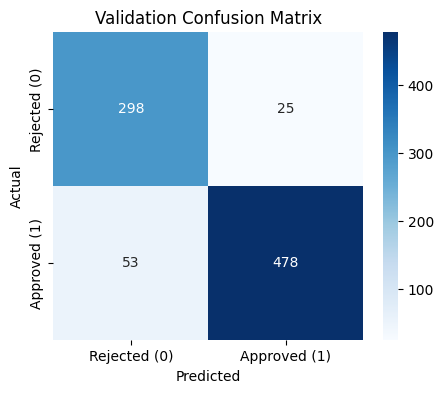

In [79]:
# Cell 4 — confusion matrix (visual)
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected (0)", "Approved (1)"],
            yticklabels=["Rejected (0)", "Approved (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Confusion Matrix")
plt.show()

In [81]:
#quick explicit values for the positive class (Approved=1)
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
print("Precision (Approved=1):", round(precision_score(y_val, y_val_pred), 3))
print("Recall    (Approved=1):", round(recall_score(y_val, y_val_pred), 3))
print("F1-score  (Approved=1):", round(f1_score(y_val, y_val_pred), 3))

Precision (Approved=1): 0.95
Recall    (Approved=1): 0.9
F1-score  (Approved=1): 0.925


lets run the eval on the test set 

In [83]:
#predictions on the test set using the trained model `log_reg`
y_test_pred = log_reg.predict(X_test)

In [84]:
#classification report (precision, recall, f1 for each class)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["Rejected (0)", "Approved (1)"]))

Test Classification Report:
              precision    recall  f1-score   support

Rejected (0)       0.87      0.93      0.90       323
Approved (1)       0.95      0.92      0.94       531

    accuracy                           0.92       854
   macro avg       0.91      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



In [85]:
#explicit precision, recall, F1 for the positive class (Approved = 1)
print("Precision (Approved=1):", round(precision_score(y_test, y_test_pred), 3))
print("Recall    (Approved=1):", round(recall_score(y_test, y_test_pred), 3))
print("F1-score  (Approved=1):", round(f1_score(y_test, y_test_pred), 3))


Precision (Approved=1): 0.953
Recall    (Approved=1): 0.919
F1-score  (Approved=1): 0.936


Confusion Matrix:
 [[299  24]
 [ 43 488]]


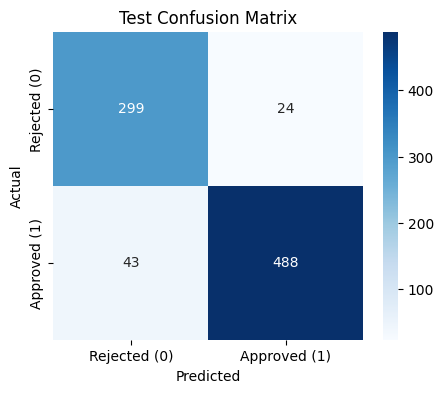

In [86]:
#confusion matrix (print + visual)
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected (0)", "Approved (1)"],
            yticklabels=["Rejected (0)", "Approved (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Test Confusion Matrix")
plt.show()

very good lets do the visualizations 

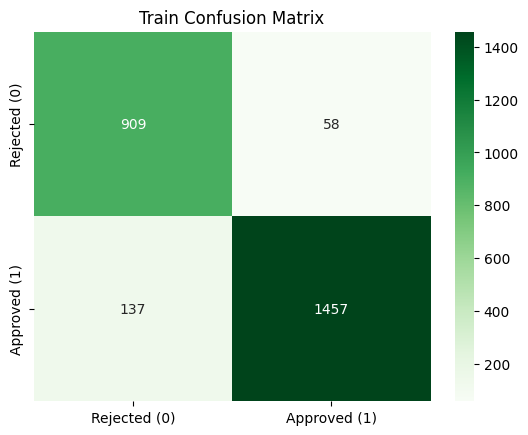

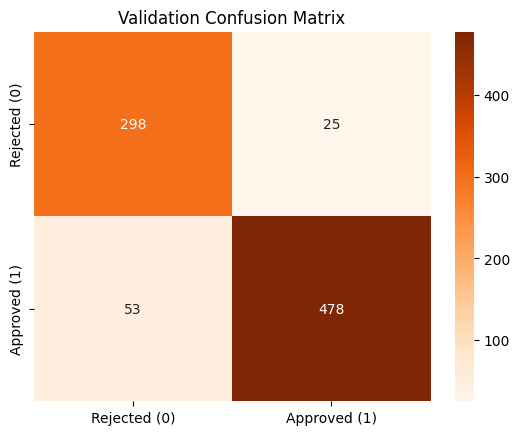

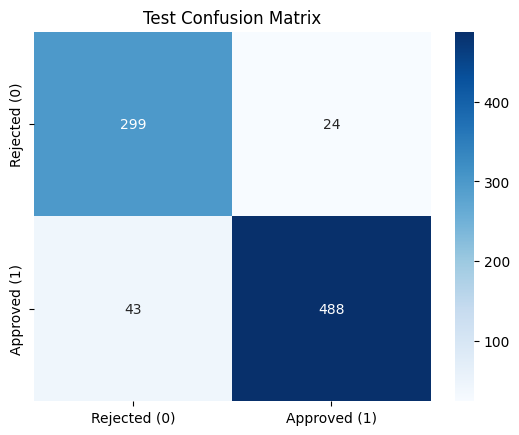

In [87]:
# Train confusion matrix
train_cm = confusion_matrix(y_train, log_reg.predict(X_train))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Rejected (0)", "Approved (1)"],
            yticklabels=["Rejected (0)", "Approved (1)"])
plt.title("Train Confusion Matrix")
plt.show()

# Validation confusion matrix
val_cm = confusion_matrix(y_val, log_reg.predict(X_val))
sns.heatmap(val_cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Rejected (0)", "Approved (1)"],
            yticklabels=["Rejected (0)", "Approved (1)"])
plt.title("Validation Confusion Matrix")
plt.show()

# Test confusion matrix (you already did, but with same style for consistency)
test_cm = confusion_matrix(y_test, log_reg.predict(X_test))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Rejected (0)", "Approved (1)"],
            yticklabels=["Rejected (0)", "Approved (1)"])
plt.title("Test Confusion Matrix")
plt.show()

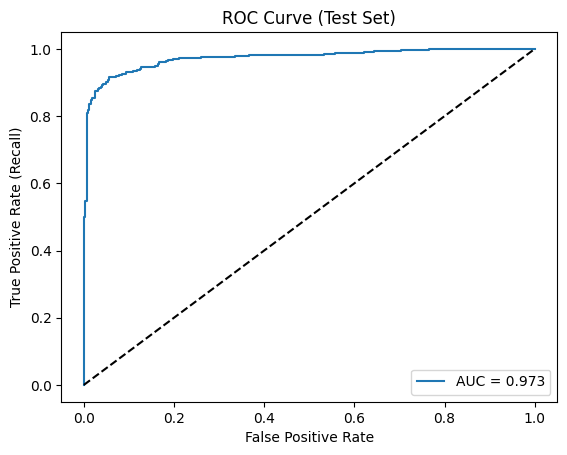

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score

y_test_proba = log_reg.predict_proba(X_test)[:, 1]  # probability of Approved (1)

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve (Test Set)")
plt.legend()
plt.show()

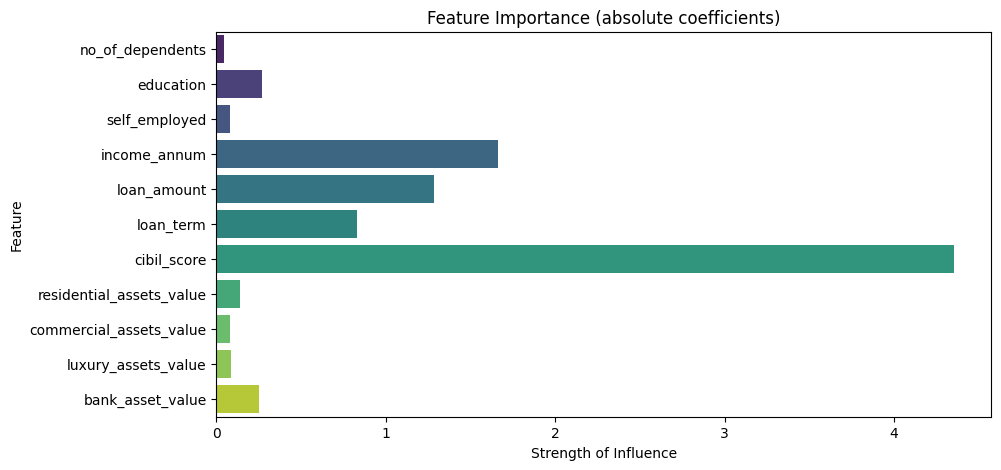

In [89]:
import numpy as np

coeffs = log_reg.coef_[0]
features = X_train.columns

plt.figure(figsize=(10,5))
sns.barplot(x=np.abs(coeffs), y=features, palette="viridis")
plt.title("Feature Importance (absolute coefficients)")
plt.xlabel("Strength of Influence")
plt.ylabel("Feature")
plt.show()